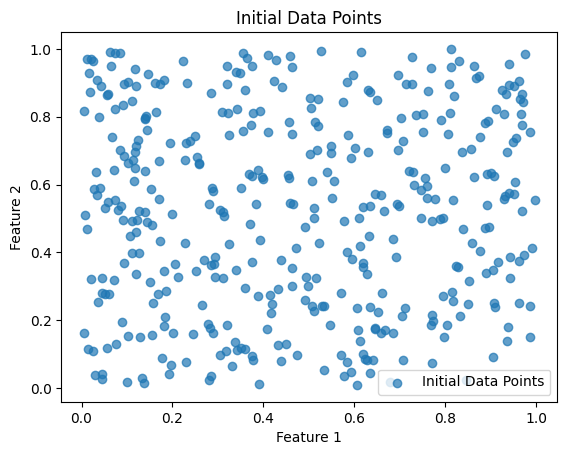

Memory limit exceeded. Old threshold: 4
Rebuilding tree with new threshold: 3.6
Memory limit exceeded. Old threshold: 3.6
Rebuilding tree with new threshold: 3.24
Memory limit exceeded. Old threshold: 3.24
Rebuilding tree with new threshold: 2.9160000000000004
Memory limit exceeded. Old threshold: 2.9160000000000004
Rebuilding tree with new threshold: 2.6244000000000005
Memory limit exceeded. Old threshold: 2.6244000000000005
Rebuilding tree with new threshold: 2.3619600000000007
Memory limit exceeded. Old threshold: 2.3619600000000007
Rebuilding tree with new threshold: 2.1257640000000007
Memory limit exceeded. Old threshold: 2.1257640000000007
Rebuilding tree with new threshold: 1.9131876000000005
Outliers: [[0.98565045 0.24205527]
 [0.67756436 0.01658783]
 [0.93672999 0.13752094]
 [0.60642906 0.00919705]
 [0.00506158 0.16080805]
 [0.03050025 0.03734819]
 [0.04600264 0.0407288 ]
 [0.100778   0.01822183]
 [0.84487531 0.02327194]
 [0.99050514 0.41261768]
 [0.38920168 0.01083765]
 [0.90

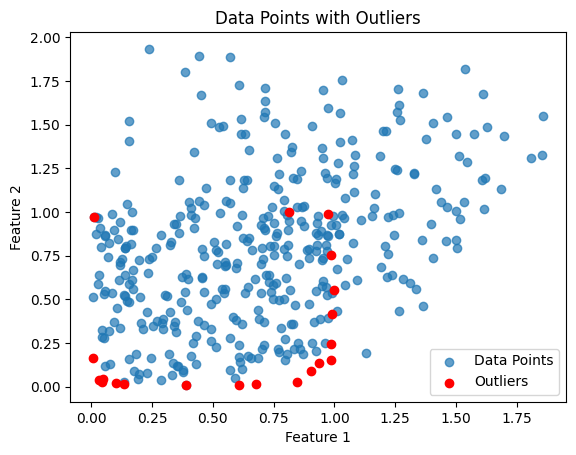

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
<ipython-input-98-635e397d53b1>:135: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_points[:, 0], data_points[:, 1], c=zz, cmap='viridis', alpha=0.7)


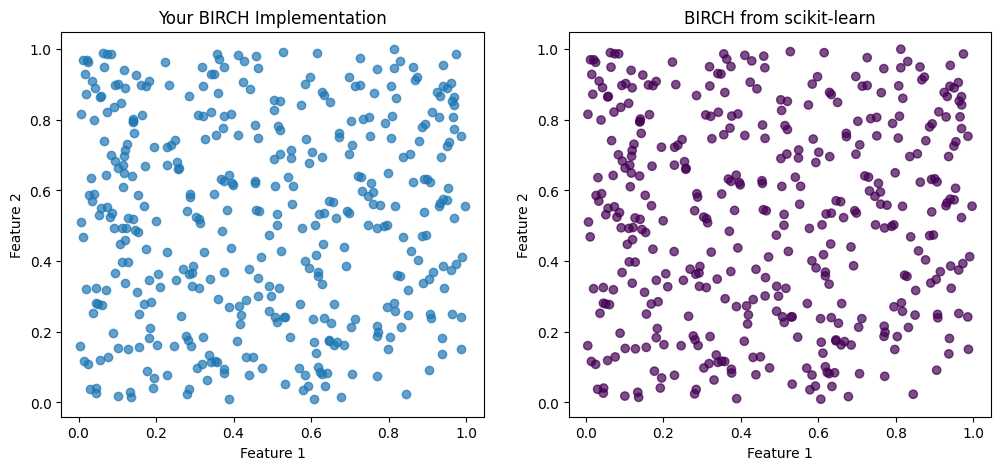

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs

class CFNode:
    def __init__(self, data_point):
        # Initialize the CFNode with a data point
        self.N = 1
        self.LS = data_point
        self.SS = np.square(data_point)
        self.child = None

    def update(self, data_point):
        # Update CFNode statistics when a new data point is added
        self.N += 1
        self.LS += data_point
        self.SS += np.square(data_point)

    def calculate_variance(self):
        # Calculate the variance of the CFNode
        mean = self.LS / self.N
        variance = (self.SS / self.N) - np.square(mean)
        return variance

class BIRCH:
    def __init__(self, threshold, branching_factor):
        # Initialize the BIRCH clustering algorithm with a threshold and branching factor
        self.threshold = threshold
        self.branching_factor = branching_factor
        self.root = None
        self.memory_limit = 2  # Set your desired memory limit

    def fit(self, X):
        # Fit the BIRCH algorithm to the input dataset X
        self.plot_initial_data(X)  # Plot the initial dataset
        X, outliers = self.remove_outliers(X)
        for data_point in X:
            self._insert(data_point)
            if self.memory_exceeded():
                print("Memory limit exceeded. Old threshold:", self.threshold)
                self.rebuild_tree()

        print("Outliers:", outliers)
        self.plot_data(X, outliers)

    def plot_initial_data(self, X):
        # Plot the initial dataset before processing with BIRCH
        plt.scatter(X[:, 0], X[:, 1], label='Initial Data Points', alpha=0.7)
        plt.title('Initial Data Points')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

    def remove_outliers(self, X, contamination=0.05):
      isolation_forest = IsolationForest(contamination=contamination)
      outliers = X[isolation_forest.fit_predict(X) == -1]
      return X[isolation_forest.fit_predict(X) == 1], outliers

    def _insert(self, data_point, node=None):
        # Insert a data point into the BIRCH tree
        if node is None:
            if self.root is None:
                # Create the root CFNode if it doesn't exist
                self.root = CFNode(data_point)
            else:
                self._insert(data_point, self.root)
        else:
            if node.child is None:
                # If the node doesn't have a child, create a new CFNode if the threshold is reached
                if node.N < self.threshold:
                    node.update(data_point)
                else:
                    node.child = CFNode(data_point)
            else:
                # If the node has a child, recursively insert the data point into the child node
                self._insert(data_point, node.child)

    def memory_exceeded(self):
        # Check if the memory limit is exceeded
        return self.root is not None and self.root.N > self.memory_limit

    def rebuild_tree(self):
        # Rebuild the tree with a higher threshold
        old_root = self.root
        self.threshold *= 0.9  # You can adjust the threshold increase strategy
        print("Rebuilding tree with new threshold:", self.threshold)
        self.root = None

        # Re-insert leaf entries of the old tree
        self._reinsert_leaves(old_root)

    def _reinsert_leaves(self, node):
        # Re-insert leaf entries of the old tree
        if node.child is None:
            self._insert(node.LS / node.N)
        else:
            self._reinsert_leaves(node.child)

    def print_tree(self, node=None, level=0):
        # Print the BIRCH tree structure (for debugging or visualization purposes)
        if node is None:
            node = self.root
        print("  " * level + f"Node: N={node.N}, LS={node.LS}, SS={node.SS}")
        if node.child is not None:
            self.print_tree(node.child, level + 1)

    def plot_data(self, X, outliers):
        # Plot the data points and outliers
        plt.scatter(X[:, 0], X[:, 1], label='Data Points', alpha=0.7)
        plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
        plt.title('Data Points with Outliers')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Generate a more random dataset
np.random.seed(42)
data_points = np.random.rand(400, 2)

# Your BIRCH implementation
your_birch = BIRCH(threshold=4, branching_factor=28)
zz = your_birch.fit(data_points)

# BIRCH from scikit-learn
sklearn_birch = Birch(threshold=0.5, branching_factor=50)
sklearn_labels = sklearn_birch.fit_predict(data_points)

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_points[:, 0], data_points[:, 1], c=zz, cmap='viridis', alpha=0.7)
plt.title('Your BIRCH Implementation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(data_points[:, 0], data_points[:, 1], c=sklearn_labels, cmap='viridis', alpha=0.7)
plt.title('BIRCH from scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()